## Benford's Law

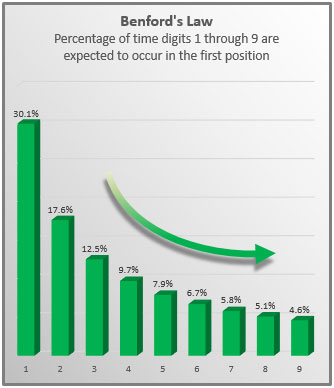

Formally, this can be written as:
$$P(s) = \log\Big({1 + \dfrac{1}{s}}\Big), s = 1,2,...,9$$

Let's Test Benford's Law using Stock Market Data.

In [87]:
from datetime import datetime
import pandas_datareader.data as wb
import numpy as np
import math
from matplotlib import pyplot as plt

#random stocks chosen from https://blueharen.github.io/sp500-picker/
stocklist = ['SNPS','PNW','MS','REG','AMZN','FOX','GOOG','LVS','PXD','TDY',
             'AOS','MHK','NVDA','BKR','FISV','CVX','FFIV','APH','ORLY','IT',
             'LLY','HSY','TDG','DUK','FMC','RCL','KMX','RMD','FTNT','GPS',
             'NVR','BBY','K','WU','SPGI','DD','AON','SBAC','ALGN','MMC','DRE',
             'LMT','MRK']

start = datetime(2016,6,8)
end = datetime(2020,6,11)

df = wb.DataReader(stocklist, 'yahoo',start,end)['Adj Close']
df = df.reset_index()
df.head()

Symbols,Date,SNPS,PNW,MS,REG,AMZN,FOX,GOOG,LVS,PXD,...,WU,SPGI,DD,AON,SBAC,ALGN,MMC,DRE,LMT,MRK
0,2016-06-08,53.439999,65.825378,23.896862,67.200348,726.640015,NaN,728.280029,38.888775,162.975723,...,16.757687,105.311020,64.360931,104.744102,103.313591,79.370003,60.864109,21.101019,215.691055,50.407322
1,2016-06-09,53.080002,66.838715,23.482666,67.977577,727.650024,NaN,728.580017,38.619175,160.147278,...,16.647490,105.311020,64.253006,104.829979,103.045654,79.690002,60.909813,21.324949,215.951263,50.022400
2,2016-06-10,52.500000,66.457626,22.996445,67.986099,717.909973,NaN,719.409973,37.785835,155.612045,...,16.410154,102.889748,64.001228,104.362419,100.247223,78.830002,60.653847,21.290501,215.870514,49.698715
3,2016-06-13,52.139999,66.397018,22.744331,67.764030,715.239990,NaN,718.359985,37.589760,156.714157,...,16.155861,102.621773,63.173950,103.083748,99.989220,78.250000,60.160210,21.187147,213.510605,49.487045
4,2016-06-14,52.169998,67.046608,22.150068,67.670090,719.299988,NaN,718.270020,38.316887,159.015900,...,16.172962,102.267670,62.502541,102.558945,99.473190,78.959999,60.059650,21.212982,215.080872,49.610519


In [88]:
count = 0
e = []
first_char = []

for ticker in df:
    if count > 1:
        for x in df[ticker]:
            e.append(x)
    count = count + 1

for index in range(len(e)):
    if str(e[index])[0] == 'n': #inefficient way of removing NaNs
        first_char.append(0)
    else:
        val = int(str(e[index])[0])
        first_char.append(val)

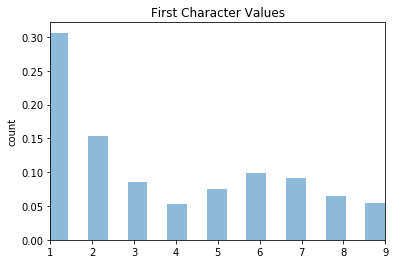

In [89]:
bins = np.linspace(0, 9, 20) # fixed number of bins
plt.xlim([1, 9])

plt.hist(first_char, weights=np.ones(len(first_char)) / len(first_char), bins=bins, alpha=0.5)
plt.title('First Character Values')
plt.ylabel('count')

plt.show()